**[LeetCode Link](https://leetcode-cn.com/problems/binary-tree-zigzag-level-order-traversal/solution/er-cha-shu-de-ju-chi-xing-ceng-ci-bian-li-by-leetc/)**

## BFS
如果需要 FIFO （先进先出）的顺序，则将新元素添加到队列尾部，后插入的元素就可以排在后面。如果需要 FILO （先进后出）的顺序，则将新元素添加到队列首部，后插入的元素就可以排在前面。
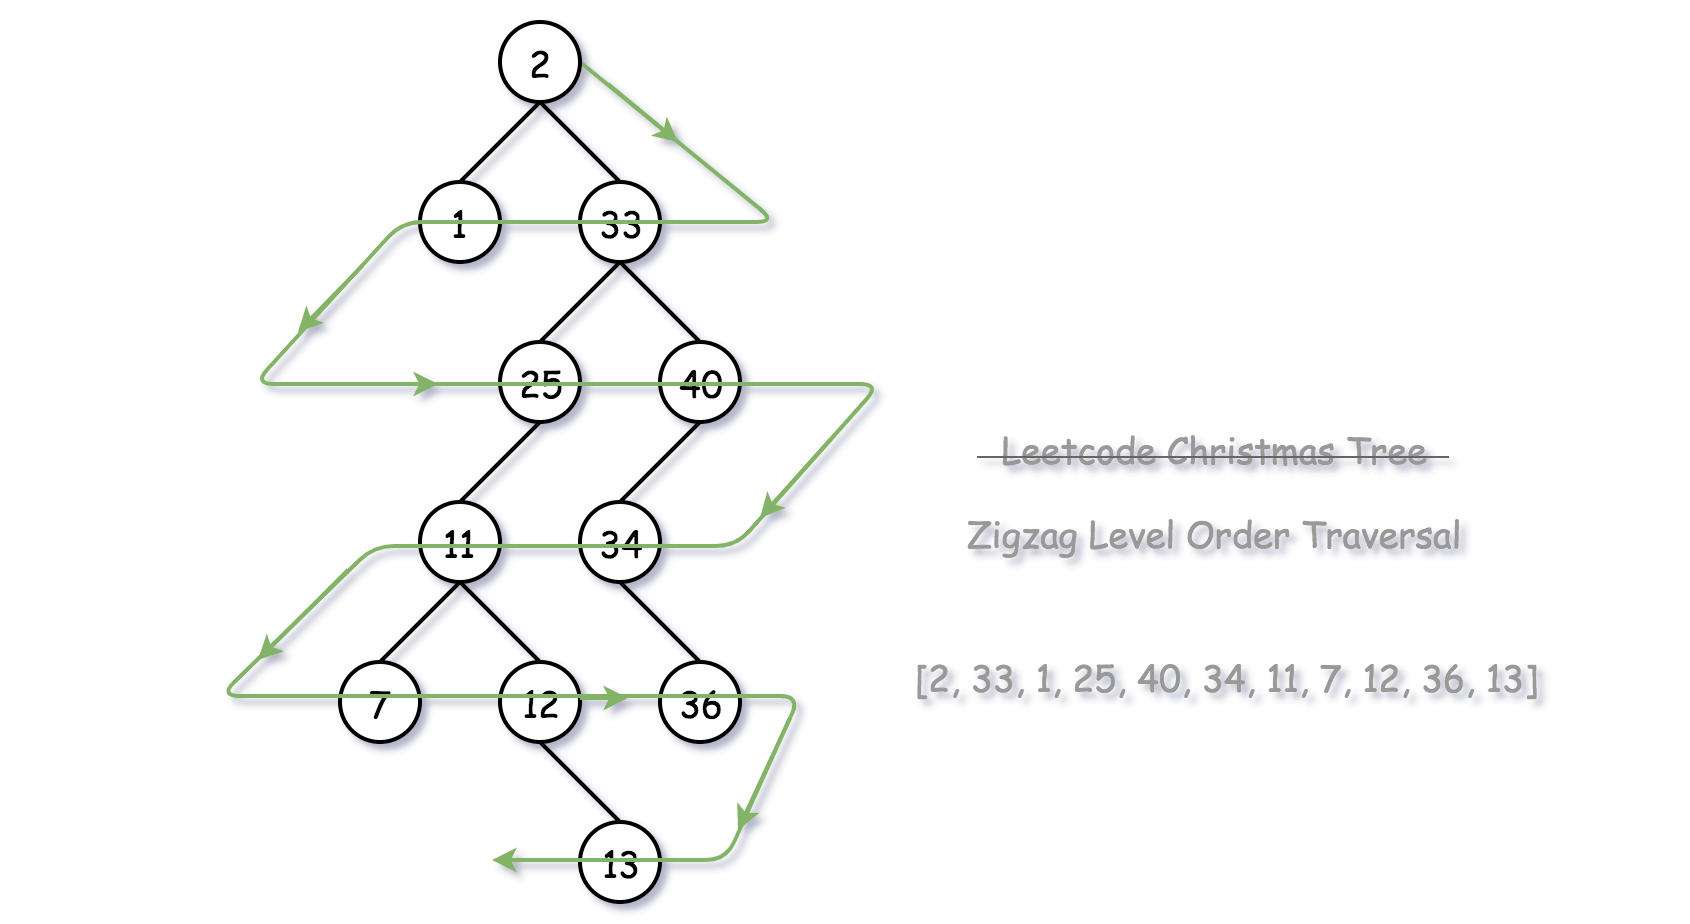

### 算法
* 将要访问的节点添加到队列中，使用 分隔符（例如：空节点）把不同层的节点分隔开。分隔符表示一层结束和新一层开始。
* 在此算法的基础上，借助双端队列实现锯齿形顺序。在每一层，使用一个空的双端队列保存该层所有的节点。根据每一层的访问顺序，即从左到右或从右到左，决定从双端队列的哪一端插入节点。

### 复杂度分析
* 时间复杂度：O(N)，其中 N 是树中节点的数量。
    * 每个节点仅访问一次。
    * 双端队列的插入操作为常数时间。如果使用数组或 list，头部插入需要 O(K) 的时间，其中 K 是数组或 list 的长度。
* 空间复杂度：O(N)，其中 N 是树中节点的数量。
    * 除了输出数组，主要的内存开销是双端队列。
    * 任何时刻，双端队列中最多只存储两层节点。因此双端队列的大小不超过 2 ⋅ L，其中 L 是一层的最大节点数。包含最多节点的层可能是完全二叉树的叶节点层，大约有 L = N / 2 个节点。因此最坏情况下，空间复杂度为 2 ⋅ N / 2 = N



In [ ]:
class Solution:
    def zigzagLevelOrder(self, root):
        """
        :type root: TreeNode
        :rtype: List[List[int]]
        """
        ret = []
        level_list = deque()
        if root is None:
            return []
        # start with the level 0 with a delimiter
        node_queue = deque([root, None])
        is_order_left = True

        while len(node_queue) > 0:
            curr_node = node_queue.popleft()

            if curr_node:
                if is_order_left:
                    level_list.append(curr_node.val)
                else:
                    level_list.appendleft(curr_node.val)

                if curr_node.left:
                    node_queue.append(curr_node.left)
                if curr_node.right:
                    node_queue.append(curr_node.right)
            else:
                # we finish one level
                ret.append(list(level_list))
                # add a delimiter to mark the level
                if len(node_queue) > 0:
                    node_queue.append(None)

                # prepare for the next level
                level_list = deque()
                is_order_left = not is_order_left

        return ret

## DFS
在 DFS 遍历期间，将结果保存在按层数索引的全局数组中。即元素 array[level] 存储同一层的所有节点。然后在 DFS 的每一步更新全局数组。
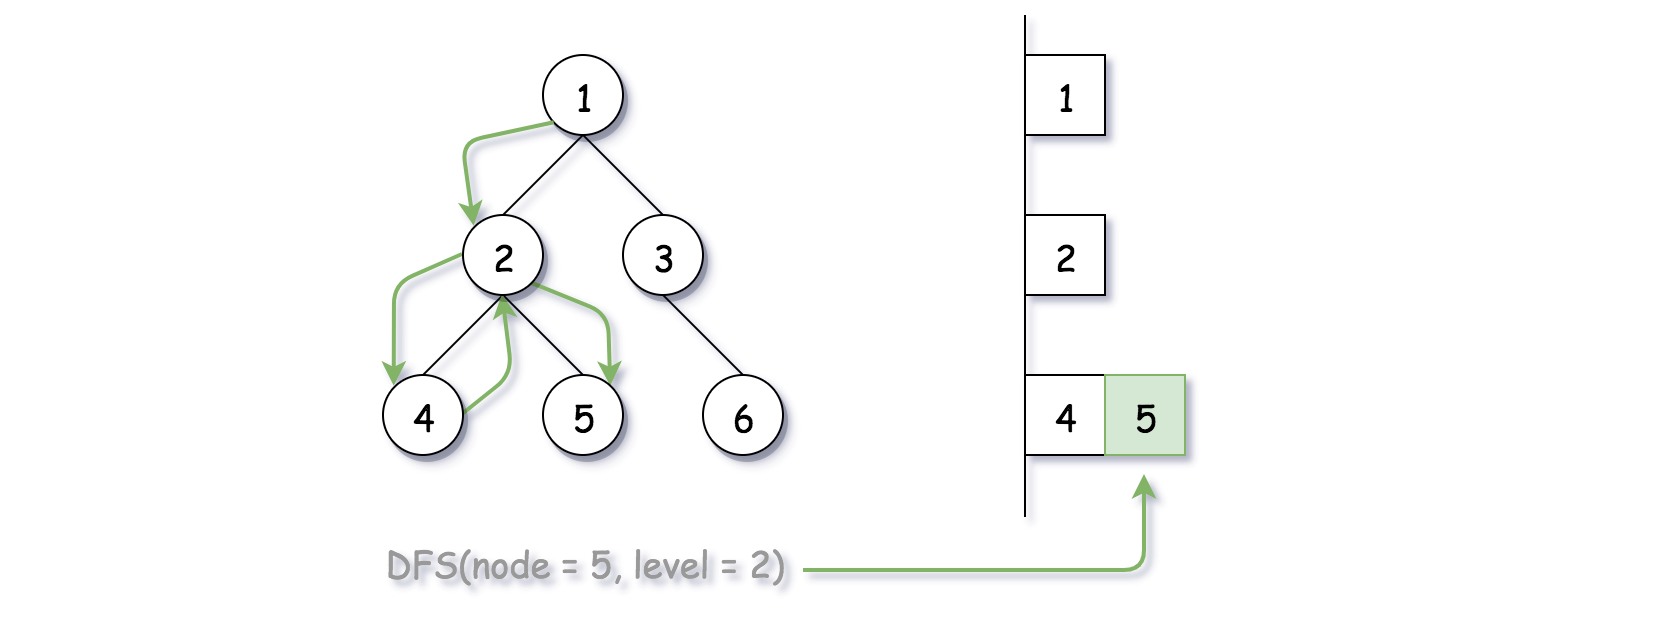

### 算法
使用递归实现 DFS 算法。定义一个递归方法 DFS(node, level)，方法参数为当前节点 node 和指定层数 level。该方法共执行三个步骤：
* 如果是第一次访问该层的节点，即该层的双端队列不存在。那么创建一个双端队列，并添加该节点到队列中。
* 如果当前层的双端队列已存在，根据顺序，将当前节点插入队列头部或尾部。
* 最后，为每个节点调用该递归方法。

### 复杂度分析
* 时间复杂度：O(N)，其中 N 是树中节点的数量。
    * 与 BFS 相同，每个节点只访问一次。
* 空间复杂度：O(H)，其中 H 是树的高度。例如：包含 N 个节点的树，高度大约为 log2N。
    * 与 BFS 不同，在 DFS 中不需要维护双端队列。
    * 方法递归调用会产生额外的内存消耗。方法 DFS(node, level) 的调用堆栈大小刚好等于节点所在层数。因此 DFS 的空间复杂度为 O(log2N)，这比 BFS 好很多。

In [ ]:
class Solution:
    def zigzagLevelOrder(self, root):
        """
        :type root: TreeNode
        :rtype: List[List[int]]
        """
        if root is None:
            return []

        results = []
        def dfs(node, level):
            if level >= len(results):
                results.append(deque([node.val]))
            else:
                if level % 2 == 0:
                    results[level].append(node.val)
                else:
                    results[level].appendleft(node.val)

            for next_node in [node.left, node.right]:
                if next_node is not None:
                    dfs(next_node, level+1)

        # normal level order traversal with DFS
        dfs(root, 0)

        return results